In [17]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-l6-v2')

## Testing Model Working

In [18]:
sentences = [
    "Data scientist with experience in NLP and Python",
    "Software engineer skilled in machine learning and SQL"
]

embeddings = model.encode(sentences)
print(embeddings.shape)

(2, 384)


# Embeddings

In [19]:
import pandas as pd 

df_job = pd.read_csv("data/cleaned_job_data_final.csv")
df_cv = pd.read_csv("data/cleaned_resume_data_final.csv")

In [20]:
job_embeddings = model.encode(df_job['cleaned_job_description'].tolist(), show_progress_bar=True)
cv_embeddings = model.encode(df_cv['cleaned_resume'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

# Semantic Similarity

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(cv_embeddings, job_embeddings)
print("similarity score:", similarity)

similarity score: [[0.6209675  0.6124866  0.60654294 ... 0.36985397 0.5486711  0.60184634]
 [0.4317672  0.32177672 0.37525192 ... 0.13907966 0.30450907 0.2878356 ]
 [0.5389446  0.53604174 0.53534484 ... 0.23510827 0.4181655  0.5379847 ]
 ...
 [0.50043315 0.42449725 0.4580879  ... 0.25202778 0.405498   0.45832273]
 [0.45874327 0.39713264 0.4990714  ... 0.33414882 0.44433367 0.5119874 ]
 [0.5699562  0.41504973 0.5992377  ... 0.36227873 0.5981538  0.56583965]]


# Save Embeddings + Similarity

In [22]:
import numpy as np

np.save("embeddings/job_embeddings.npy", job_embeddings)
np.save("embeddings/cv_embeddings.npy", cv_embeddings)

In [23]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(cv_embeddings, job_embeddings)

similarity_df = pd.DataFrame(
    similarity,
    index=df_cv['category'],        # or any unique resume ID
    columns=df_job['simplified_job_title']      # or job titles/categories
)

similarity_df.to_csv("outputs/similarity_scores.csv")

# Top Matches

In [24]:
import pandas as pd

similarity_df = pd.read_csv("outputs/similarity_scores.csv")
similarity_df.head(5)

,category,Data Scientist,Data Scientist.1,Data Scientist.2,Data Scientist.3,Data Scientist.4,Data Scientist.5,Data Scientist.6,Data Scientist.7,Data Scientist.8,...,Data Scientist.351,Data Scientist.352,Data Scientist.353,Data Scientist.354,Data Scientist.355,Data Scientist.356,Data Scientist.357,Data Scientist.358,Machine Learning Engineer.31,Data Engineer.95
0,Data Science,0.620968,0.612487,0.606543,0.563118,0.622309,0.616564,0.640348,0.602860,0.374556,...,0.338470,0.610320,0.656542,0.470556,0.607810,0.577699,0.596886,0.369854,0.548671,0.601846
1,Data Science,0.431767,0.321777,0.375252,0.346281,0.350054,0.343059,0.462117,0.395355,0.211953,...,0.337720,0.398599,0.396188,0.350948,0.419076,0.370205,0.421393,0.139080,0.304509,0.287836
2,Data Science,0.538945,0.536042,0.535345,0.412224,0.548948,0.515142,0.529060,0.490336,0.284102,...,0.358862,0.548189,0.520859,0.406463,0.541216,0.579838,0.592935,0.235108,0.418166,0.537985
3,Data Science,0.649151,0.548164,0.630767,0.441792,0.622378,0.590207,0.643511,0.604755,0.317115,...,0.481072,0.607928,0.612537,0.549312,0.666164,0.604063,0.636920,0.297383,0.392201,0.620409
4,Data Science,0.653461,0.557515,0.603079,0.507000,0.635295,0.557837,0.697323,0.605158,0.343161,...,0.489973,0.623067,0.662016,0.518156,0.669320,0.578383,0.651040,0.307286,0.459045,0.559674


In [25]:
cv_df = pd.read_csv("data/cleaned_resume_data_final.csv")
cv_df.head(5)

,category,Resume,resume_length,cleaned_resume,text_length
0,Data Science,Skills * Programming Languages: Python (pandas...,670,programming language python panda numpy scipy ...,499
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,163,education may may b.e uit rgpv data scientist ...,127
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",265,area interest deep learning control system des...,188
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,993,r python sap hana tableau sap hana sql sap han...,724
4,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,241,python tableau data visualization r studio mac...,172


In [26]:
Top_N = 5

similarity_df = similarity_df.apply(pd.to_numeric, errors='coerce')

top_matches = similarity_df.apply(lambda row: row.nlargest(Top_N).index.tolist(), axis=1)
top_scores = similarity_df.apply(lambda row: row.nlargest(Top_N).values.tolist(), axis=1)

matches_df = pd.DataFrame({
    "CV_ID": cv_df['category'],
    "CV_Category": cv_df['category'],
    "Top_JD_Categories": top_matches,
    "Match_Scores": top_scores
})

matches_df.head()

,CV_ID,CV_Category,Top_JD_Categories,Match_Scores
0,Data Science,Data Science,"[Data Scientist.195, Data Scientist.144, Data ...","[0.7132432, 0.7116245, 0.70198643, 0.6983115, ..."
1,Data Science,Data Science,"[Data Scientist.264, Data Scientist.281, Data ...","[0.514878, 0.50839853, 0.48954463, 0.4862132, ..."
2,Data Science,Data Science,"[Data Scientist.293, Data Scientist.282, Data ...","[0.62620485, 0.596589, 0.5929347, 0.5816834, 0..."
3,Data Science,Data Science,"[Data Engineer.27, Data Engineer.39, Data Scie...","[0.69160163, 0.6779484, 0.6720464, 0.6692674, ..."
4,Data Science,Data Science,"[Data Scientist.142, Data Scientist.189, Data ...","[0.7309114, 0.71535033, 0.71473014, 0.7137886,..."


In [27]:
matches_df["Top_Score"] = matches_df["Match_Scores"].apply(lambda x: max(x))

In [28]:
matches_df.to_csv("outputs/top_matches.csv")

# Extract Missing Skills

In [29]:
# Example simple function to get keywords from text
def extract_keywords(text):
    tokens = text.split()  # Or use your tokenized + cleaned list
    return set(tokens)

# Compute missing skills per CV for the top matched JD
missing_skills_list = []

for cv_idx, jd_indices in top_matches.items():
    cv_keywords = extract_keywords(df_cv.loc[cv_idx, 'cleaned_resume'])
    # Take the top JD only for missing skills
    top_jd_idx = jd_indices[0]
    jd_keywords = extract_keywords(df_job.loc[df_job['simplified_job_title'] == top_jd_idx, 'cleaned_job_description'].str.cat(sep=' '))
    
    missing_skills = jd_keywords - cv_keywords
    missing_skills_list.append(list(missing_skills))

matches_df['Missing_Skills'] = missing_skills_list
matches_df.head()


,CV_ID,CV_Category,Top_JD_Categories,Match_Scores,Top_Score,Missing_Skills
0,Data Science,Data Science,"[Data Scientist.195, Data Scientist.144, Data ...","[0.7132432, 0.7116245, 0.70198643, 0.6983115, ...",0.713243,[]
1,Data Science,Data Science,"[Data Scientist.264, Data Scientist.281, Data ...","[0.514878, 0.50839853, 0.48954463, 0.4862132, ...",0.514878,[]
2,Data Science,Data Science,"[Data Scientist.293, Data Scientist.282, Data ...","[0.62620485, 0.596589, 0.5929347, 0.5816834, 0...",0.626205,[]
3,Data Science,Data Science,"[Data Engineer.27, Data Engineer.39, Data Scie...","[0.69160163, 0.6779484, 0.6720464, 0.6692674, ...",0.691602,[]
4,Data Science,Data Science,"[Data Scientist.142, Data Scientist.189, Data ...","[0.7309114, 0.71535033, 0.71473014, 0.7137886,...",0.730911,[]


In [30]:
matches_df.to_csv("outputs/top_matches.csv")

# Visualizaion

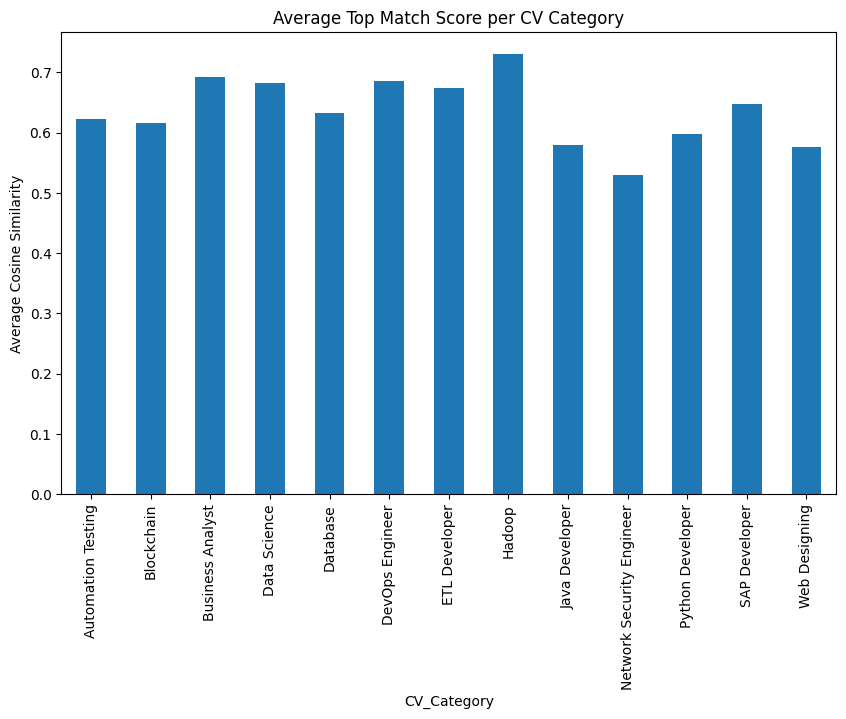

In [31]:
import matplotlib.pyplot as plt

# Average match score per CV category
matches_df['Top_Score'] = matches_df['Match_Scores'].apply(lambda x: x[0])  # top score only
avg_scores = matches_df.groupby('CV_Category')['Top_Score'].mean()

avg_scores.plot(kind='bar', figsize=(10,6), title='Average Top Match Score per CV Category')
plt.ylabel('Average Cosine Similarity')
plt.show()

In [ ]:
#“Initial missing skills extraction produced limited results, suggesting the need for a richer skill vocabulary or fuzzy matching to capture multi-word and domain-specific terms.